## Compare present and future ozone burden, Fig 2a

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [2]:
rcParams['font.size'] = 20

In [3]:
#imported from o3_conc_bur_future.ipynb and rf_o3_all_present_updated.ipynb

o3_burdens = [3440.029 , 3450.128 , 3350.0374, 3417.3064, 3472.9695, 3355.1692,
       3351.367 , 3418.6912, 3475.163 , 3357.4158, 3338.3425, 3470.1125,
       3344.5676, 3458.4785, 3339.9397, 3472.6355, 3347.3545, 3477.5176,
       3478.8186, 3046.04  , 3144.239 , 3149.128 , 3050.5771, 3041.0725,
       3138.955 , 3065.3982, 3041.0967, 3138.9587, 3047.1895, 3145.4707,
       3151.3909, 3052.658 ]

member_labs_future = ['EMAC_C1.2_All_SSP3', 'EMAC_C1_SSP3', 'MOZART3_C1.1_NOx_SSP1',
       'MOZART3_C1.1_NOx_SSP1_with_SSP3_BG', 'MOZART3_C1.1_NOx_SSP3',
       'MOZART3_C1.1_NOx_SSP3_with_SSP1_BG', 'MOZART3_C1_SSP1',
       'MOZART3_C1_SSP1_with_SSP3_BG', 'MOZART3_C1_SSP3',
       'MOZART3_C1_SSP3_with_SSP1_BG', 'LMDZ-INCA_C1.1_All_SSP1',
       'LMDZ-INCA_C1.1_All_SSP3', 'LMDZ-INCA_C1.1_All_SSP3_with_SSP1_BG',
       'LMDZ-INCA_C1.2_All_SSP3', 'LMDZ-INCA_C1_SSP1', 'LMDZ-INCA_C1_SSP3',
       'LMDZ-INCA_C1_SSP3_with_SSP1_BG',
       'LMDZ-INCA_with_SSP3_BG_C1.1_All_SSP1',
       'LMDZ-INCA_with_SSP3_BG_C1_SSP1', 'OsloCTM3_C1.1_All_SSP1',
       'OsloCTM3_C1.1_All_SSP1_with_SSP3_BG', 'OsloCTM3_C1.1_All_SSP3',
       'OsloCTM3_C1.1_All_SSP3_with_SSP1_BG', 'OsloCTM3_C1.2_All_SSP1',
       'OsloCTM3_C1.2_All_SSP3', 'OsloCTM3_C1.2_All_SSP3_with_SSP1_BG',
       'OsloCTM3_C1.2_NOx_SSP1', 'OsloCTM3_C1.2_NOx_SSP3', 'OsloCTM3_C1_SSP1',
       'OsloCTM3_C1_SSP1_with_SSP3_BG', 'OsloCTM3_C1_SSP3',
       'OsloCTM3_C1_SSP3_with_SSP1_BG']

# deleted GEOS-Chem
o3_burdens_present = [3396.83  , 3391.4746, 3400.6172,
       3399.1418, 3392.2722, 3365.7683, 3364.1472, 3356.7776, 3143.0996,
       3141.7227, 3135.777 ]

member_labs_present = ['EMAC_A1', 'EMAC_B1.2_All', 'MOZART3_A1', 'MOZART3_B1.1_NOx',
       'MOZART3_B1.2_NOx', 'LMDZ-INCA_A1', 'LMDZ-INCA_B1.1_NOx',
       'LMDZ-INCA_B1.2_All', 'OsloCTM3_A1', 'OsloCTM3_B1.1_NOx',
       'OsloCTM3_B1.2_All']

In [4]:
o3_bur_all = xr.Dataset(
    data_vars=dict(
        O3_bur_sum=(['member'],o3_burdens_present+o3_burdens)),
    coords=dict(member=(member_labs_present+member_labs_future)),
)

In [5]:
o3_bur_all

<xarray.Dataset>
Dimensions:     (member: 43)
Coordinates:
  * member      (member) <U36 'EMAC_A1' ... 'OsloCTM3_C1_SSP3_with_SSP1_BG'
Data variables:
    O3_bur_sum  (member) float64 3.397e+03 3.391e+03 ... 3.151e+03 3.053e+03

### Collate into paired data

In [6]:
o3_bur_C1_SSP1 = o3_bur_all.sel(member=['MOZART3_C1_SSP1','LMDZ-INCA_C1_SSP1','OsloCTM3_C1_SSP1'])
o3_bur_C1_SSP3 = o3_bur_all.sel(member=['MOZART3_C1_SSP3','LMDZ-INCA_C1_SSP3','OsloCTM3_C1_SSP3','EMAC_C1_SSP3'])
o3_bur_C1_1_SSP1 = o3_bur_all.sel(member=['MOZART3_C1.1_NOx_SSP1','LMDZ-INCA_C1.1_All_SSP1','OsloCTM3_C1.1_All_SSP1'])
o3_bur_C1_1_SSP3 = o3_bur_all.sel(member=['MOZART3_C1.1_NOx_SSP3','LMDZ-INCA_C1.1_All_SSP3','OsloCTM3_C1.1_All_SSP3'])
o3_bur_C1_2_SSP1 = o3_bur_all.sel(member=['OsloCTM3_C1.2_All_SSP1'])
o3_bur_C1_2_SSP3 = o3_bur_all.sel(member=['LMDZ-INCA_C1.2_All_SSP3','OsloCTM3_C1.2_All_SSP3','EMAC_C1.2_All_SSP3'])
o3_bur_C1_SSP1BG_SSP3ems = o3_bur_all.sel(member=['MOZART3_C1_SSP3_with_SSP1_BG','LMDZ-INCA_C1_SSP3_with_SSP1_BG','OsloCTM3_C1_SSP3_with_SSP1_BG'])
o3_bur_C1_1_SSP1BG_SSP3ems = o3_bur_all.sel(member=['MOZART3_C1.1_NOx_SSP3_with_SSP1_BG','LMDZ-INCA_C1.1_All_SSP3_with_SSP1_BG','OsloCTM3_C1.1_All_SSP3_with_SSP1_BG'])
o3_bur_C1_SSP3BG_SSP1ems = o3_bur_all.sel(member=['MOZART3_C1_SSP1_with_SSP3_BG','LMDZ-INCA_with_SSP3_BG_C1_SSP1','OsloCTM3_C1_SSP1_with_SSP3_BG'])
o3_bur_C1_1_SSP3BG_SSP1ems = o3_bur_all.sel(member=['MOZART3_C1.1_NOx_SSP1_with_SSP3_BG','LMDZ-INCA_with_SSP3_BG_C1.1_All_SSP1','OsloCTM3_C1.1_All_SSP1_with_SSP3_BG'])



o3_bur_A1 = o3_bur_all.sel(member=['MOZART3_A1','LMDZ-INCA_A1','OsloCTM3_A1','EMAC_A1'])
o3_bur_B1_2_All = o3_bur_all.sel(member=['MOZART3_B1.2_NOx','LMDZ-INCA_B1.2_All','OsloCTM3_B1.2_All','EMAC_B1.2_All'])
o3_bur_B1_1_NOx = o3_bur_all.sel(member=['MOZART3_B1.1_NOx','LMDZ-INCA_B1.1_NOx','OsloCTM3_B1.1_NOx'])

In [7]:
#diff is c1.1 - C1
# positive is C1 - C1.1
o3_bur_diff_SSP1_C1_1 = o3_bur_C1_SSP1.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3']) - o3_bur_C1_1_SSP1.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3'])
o3_bur_diff_SSP3_C1_1 = o3_bur_C1_SSP3.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC']) - o3_bur_C1_1_SSP3.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3']) 
o3_bur_diff_SSP3_C1_2 = o3_bur_C1_SSP3.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC']) - o3_bur_C1_2_SSP3.assign_coords(member=['LMDZ-INCA','OsloCTM3','EMAC']) 

o3_bur_diff_SSP1BG_SSP3ems_C1_1 = o3_bur_C1_SSP1BG_SSP3ems.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3']) - o3_bur_C1_1_SSP1BG_SSP3ems.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3'])
o3_bur_diff_SSP3BG_SSP1ems_C1_1 = o3_bur_C1_SSP3BG_SSP1ems.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3']) - o3_bur_C1_1_SSP3BG_SSP1ems.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3'])

o3_bur_diff_B1_2 = o3_bur_A1.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC']) - o3_bur_B1_2_All.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC'])
o3_bur_diff_B1_1 = o3_bur_A1.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC']) - o3_bur_B1_1_NOx.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3'])

In [8]:
#rescaling values for 20% to 100%
o3_rescaling_20_to_100 = [1.18, 1.13, 1.09]

#NOx ems
SSP1_20_NOx = [0.873,0.880,0.870]
SSP3_20_NOx = [1.771,1.785,1.761]
PD_20_NOx = [1.105,1.119, 1.084]

#EMAC NOx PD = 0.982

In [9]:
# Prepare data for grouped bar chart
labels = ['MOZART3', 'LMDZ-INCA', 'OsloCTM3','EMAC']

# Extract values for each group
values1 = o3_bur_diff_SSP3_C1_1['O3_bur_sum'].values 
values3 = o3_bur_diff_SSP1_C1_1['O3_bur_sum'].values  
values4 = o3_bur_diff_B1_2['O3_bur_sum'].values
values5 = o3_bur_diff_B1_1['O3_bur_sum'].values
values6 = np.insert(o3_bur_diff_SSP3_C1_2['O3_bur_sum'].values, 0, 0)

# Define colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728']  # blue, orange, green

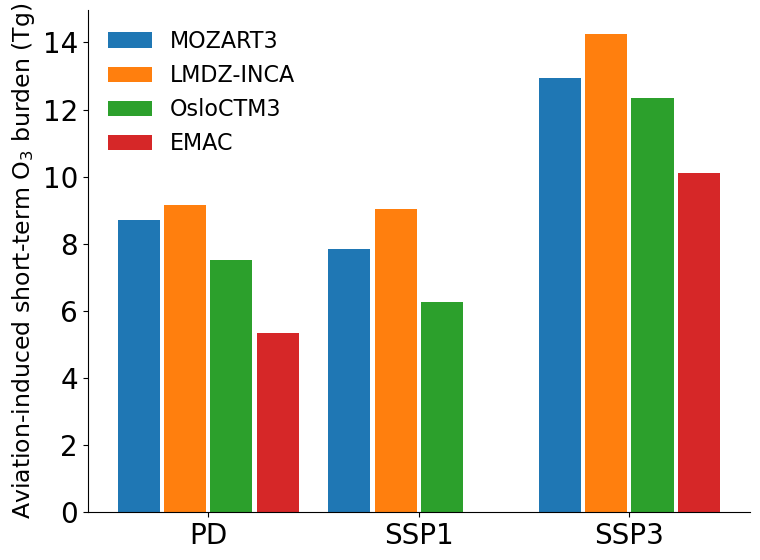

In [10]:
# Group data for plotting
group_data = [np.append(values5*o3_rescaling_20_to_100*5,o3_bur_diff_B1_2.sel(member='EMAC').O3_bur_sum.values), 
              values3*o3_rescaling_20_to_100*5,
              np.append(values1*o3_rescaling_20_to_100*5,o3_bur_diff_SSP3_C1_2.sel(member='EMAC').O3_bur_sum.values)
              ]

#group_data = [values5, values1, values3]
group_names = ['PD','SSP1', 'SSP3']

n_groups = len(group_names)
# Find the maximum number of models in any group
n_models = max(len(g) for g in group_data)
bar_width = 0.20
gap = 0.02
x = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each model index present in any group
for i in range(n_models):
    # For each group, get value if it exists, else np.nan
    heights = [group_data[g][i] if i < len(group_data[g]) else np.nan for g in range(n_groups)]
    offset = (i - (n_models-1)/2) * (bar_width + gap)
    color = colors[i] if i < len(colors) else None
    label = labels[i] if i < len(labels) else f'Model {i+1}'
    ax.bar(x + offset, heights, width=bar_width, color=color, label=label)

ax.set_xticks(x)
ax.set_xticklabels(group_names)
ax.set_ylabel('Aviation-induced short-term O$_3$ burden (Tg)',fontsize=17)
#ax.set_title('PD, SSP1 and SSP3 20% x5')
ax.legend(loc=2,fontsize=16,frameon=False)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()